#### 수정 & 보완 부분
- 우선 Monetary를 구할 때, quantity가 음수인 경우도 포함된 결제 정보를 불러오되, 음수는 0으로 치환하고
  quantity * price 로 값을 구한다.
- agg 함수를 사용해서 Recency와 Frequency를 한번에 구한다.
- 결론 : Monetary 와 Recency, Frequency를 따로따로 구한다.

### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- InvoiceNo: 거래 번호
- StockCode: 상품 코드
- Description: 상품명 
- InvoiceDate: 거래 날짜
- UnitPrice: 상품 단가
- CustomerID: 고객 번호
- Country: 국가명

In [1]:
import pandas as pd
import numpy as np

co_df = pd.read_csv('./datasets/customer_invoice_data.csv')
co_df.info()
co_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [2]:
co_df.columns = ['invoice', 'code', 'description', 'quantity','date' ,'price', 'id','country']

In [3]:
co_df

,invoice,code,description,quantity,date,price,id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
# 결측치 확인 
co_df.isnull().sum()
# 확인 결과 -> description에 1454개, 고객 id에 135080개 발견 


invoice             0
code                0
description      1454
quantity            0
date                0
price               0
id             135080
country             0
dtype: int64

In [5]:
# description 컬럼을 제거 
co_df.drop(columns=['description'], inplace=True)
co_df

,invoice,code,quantity,date,price,id,country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [6]:
# description 결측치 제거 후 확인 결과 
co_df.isnull().sum()

invoice          0
code             0
quantity         0
date             0
price            0
id          135080
country          0
dtype: int64

In [7]:
# co_df = co_df.drop(index=co_df['id'].isna()].index, axis=1)
co_df = co_df.dropna()
co_df.isnull().sum()

invoice     0
code        0
quantity    0
date        0
price       0
id          0
country     0
dtype: int64

In [8]:
co_df[["id"]].describe().T # 고객 id 컬럼에 대한 통계량을 계산 하고 전치 행렬 처리함 

,count,mean,std,min,25%,50%,75%,max
id,406829.0,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0


In [9]:
# 5270 개의 중복된 행이 있다는 결과가 나옴 
co_df.duplicated().sum() 

5227

In [10]:
co_df = co_df.drop_duplicates()
co_df.duplicated().sum() 

0

In [11]:
co_df[["id"]].describe().T
 # 데이터 수와 평균,표준편차, 최소,최대값, 사분위 분포도 추출

,count,mean,std,min,25%,50%,75%,max
id,401602.0,15281.172576,1714.002257,12346.0,13939.0,15145.0,16784.0,18287.0


In [12]:
# 데이터 프레임 데이터수 재확인 
co_df.value_counts()
co_df = co_df.reset_index(drop=True)
co_df # 인덱스 초기화 후 재 확인 

,invoice,code,quantity,date,price,id,country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
401597,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
401598,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
401599,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
401600,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [13]:
# 무엇을 기준점으로 삼을 것인가 -> 결제 금액을 기준으로 이상치를 제거 할 것이다.
import numpy as np

Q1 = co_df.describe().T.loc['price', '25%']
Q3 = co_df.describe().T.loc['price', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
upper_bound = Q3 + iqr * 1.5

if lower_bound < 0:
    lower_bound = 0

print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

정상치 범위: 0 ~ 7.5


In [14]:
# 우선 수량이 음수인 경우도 있으므로 이를 제거 
# co_df = co_df[co_df['quantity'] > 0]
# co_df
#============== 음수인 quantity도 제거하지 않고 계속 놔두기로 함 ==============#
co_df[co_df['price'] < 0] # price가 음수인 경우는 없음 

,invoice,code,quantity,date,price,id,country


In [15]:
# co_df[co_df['price'] < lower_bound] # 이상치 검사 (최소범위보다 작은 경우)

# # 이상치 제거 
# co_df = co_df[co_df['price'] > lower_bound]

In [16]:
# 날짜 형식을 년/월/일로 바꿈
co_df['date'] = pd.to_datetime(co_df['date']).dt.strftime('%Y/%m/%d')
co_df

,invoice,code,quantity,date,price,id,country
0,536365,85123A,6,2010/12/01,2.55,17850.0,United Kingdom
1,536365,71053,6,2010/12/01,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010/12/01,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010/12/01,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010/12/01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
401597,581587,22613,12,2011/12/09,0.85,12680.0,France
401598,581587,22899,6,2011/12/09,2.10,12680.0,France
401599,581587,23254,4,2011/12/09,4.15,12680.0,France
401600,581587,23255,4,2011/12/09,4.15,12680.0,France


In [18]:
# 'date' 열을 복사하여 새로운 데이터프레임에 할당
# co_df_copy = co_df.copy()

# 'date' 열의 값을 일 수로 변환하여 새로운 열에 저장 (최신날짜에서 빼줌으로써, Recency를 구할 때 정확한 값으로 구할 수 있음)
# co_df['date'] = (pd.to_datetime('2011-12-09') - pd.to_datetime(co_df_copy['date'])).dt.days

# 결과 확인
print(co_df)
co_df

       invoice    code  quantity        date  price       id         country
0       536365  85123A         6  2010/12/01   2.55  17850.0  United Kingdom
1       536365   71053         6  2010/12/01   3.39  17850.0  United Kingdom
2       536365  84406B         8  2010/12/01   2.75  17850.0  United Kingdom
3       536365  84029G         6  2010/12/01   3.39  17850.0  United Kingdom
4       536365  84029E         6  2010/12/01   3.39  17850.0  United Kingdom
...        ...     ...       ...         ...    ...      ...             ...
401597  581587   22613        12  2011/12/09   0.85  12680.0          France
401598  581587   22899         6  2011/12/09   2.10  12680.0          France
401599  581587   23254         4  2011/12/09   4.15  12680.0          France
401600  581587   23255         4  2011/12/09   4.15  12680.0          France
401601  581587   22138         3  2011/12/09   4.95  12680.0          France

[401602 rows x 7 columns]


,invoice,code,quantity,date,price,id,country
0,536365,85123A,6,2010/12/01,2.55,17850.0,United Kingdom
1,536365,71053,6,2010/12/01,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010/12/01,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010/12/01,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010/12/01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
401597,581587,22613,12,2011/12/09,0.85,12680.0,France
401598,581587,22899,6,2011/12/09,2.10,12680.0,France
401599,581587,23254,4,2011/12/09,4.15,12680.0,France
401600,581587,23255,4,2011/12/09,4.15,12680.0,France


### date의 값이 클 수록 더 예전에 거래한 내용임을 확인 할 수 있음

In [19]:
co_rf_df = co_df[co_df['quantity'] >= 0]
co_rf_df # 결제 수량이 음수 인 것만 제외 한것만 Recency와 Frequency를 담을 데이터프레임에 저장 

,invoice,code,quantity,date,price,id,country
0,536365,85123A,6,2010/12/01,2.55,17850.0,United Kingdom
1,536365,71053,6,2010/12/01,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010/12/01,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010/12/01,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010/12/01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
401597,581587,22613,12,2011/12/09,0.85,12680.0,France
401598,581587,22899,6,2011/12/09,2.10,12680.0,France
401599,581587,23254,4,2011/12/09,4.15,12680.0,France
401600,581587,23255,4,2011/12/09,4.15,12680.0,France


In [21]:
# Recency 구하기 
# 날짜의 가장 최소값을 가져옴 (즉 각 id에서 가장 최신 날짜를 불러옴)
# rfm_r = co_df.groupby('id')['date'].min().reset_index()
# rfm_r.columns = ['id', 'Recency']
# rfm_r

#=================================수정된 부분========================================================#
# loc 함수를 사용해서 계산된 날짜 간격을 'Recency' 열에 할당하여 새로운 열을 생성한다.
# 기존 quantity가 자연수인것만 저장된 co_rf_df에 최신날짜 2011-12-10에서 각 date를 뺀 차이를 계산한다. 
# 이를 통해 각 행의 'date' 값과 '2011-12-10' 사이의 시간 간격이 나타난다.
co_rf_df.loc[:,'Recency'] = (pd.to_datetime('2011-12-10') - pd.to_datetime(co_rf_df['date'])).dt.days
co_rf_df
#=================================수정된 부분========================================================#


,invoice,code,quantity,date,price,id,country,Recency
0,536365,85123A,6,2010/12/01,2.55,17850.0,United Kingdom,374
1,536365,71053,6,2010/12/01,3.39,17850.0,United Kingdom,374
2,536365,84406B,8,2010/12/01,2.75,17850.0,United Kingdom,374
3,536365,84029G,6,2010/12/01,3.39,17850.0,United Kingdom,374
4,536365,84029E,6,2010/12/01,3.39,17850.0,United Kingdom,374
...,...,...,...,...,...,...,...,...
401597,581587,22613,12,2011/12/09,0.85,12680.0,France,1
401598,581587,22899,6,2011/12/09,2.10,12680.0,France,1
401599,581587,23254,4,2011/12/09,4.15,12680.0,France,1
401600,581587,23255,4,2011/12/09,4.15,12680.0,France,1


In [22]:
#Frequency 구하기 
 
# rfm_f = co_df['id'].value_counts().reset_index()
# rfm_f.columns = ['id', 'Frequency']
# rfm_f
# 확인 결과 id가 12346인 회원이 굉장히 많은 빈도수를 차지하는 것을 알 수 있으며, VIP 회원이 될 가능성이 매우 높음

#=================================수정된 부분========================================================#
# agg 함수를 통해서 사용자 id에 해당되는 Recency와 Frequency를 한번에 구해보자 
# Recency에는 Recency의 최소값(min)을 가져오고, Frequency에는 합계(count)를 가져오는 동작을 agg 함수로 한번에 처리 
rf_df = co_rf_df.groupby('id').agg(Recency=('Recency','min'), Frequency=('id','count'))
rf_df
#=================================수정된 부분========================================================#


,Recency,Frequency
id,,
12346.0,326,1
12347.0,3,182
12348.0,76,31
12349.0,19,73
12350.0,311,17
...,...,...
18280.0,278,10
18281.0,181,7
18282.0,8,12


In [23]:
# # Monetary 구하기 
# rfm_m = co_df.groupby('id')['price'].sum().reset_index()
# rfm_m.columns = ['id', 'Monetary']
# rfm_m

# mf_df = co_df.copy(): 'co_df' 데이터프레임을 얕은 복사하여 'mf_df' 데이터프레임을 생성
# 이는 'co_df'와 동일한 내용을 가진 새로운 데이터프레임을 만들어서 다른 변수명으로 참조하게 된다. 
# 얕은 복사를 사용하는 이유는 원본 데이터프레임의 내용을 변경하지 않고 새로운 변수로 복사하기 위함이다.
# mf_df에는 기존 co_df를 얕은복사 한 co_df.copy() 
# Monetary 라는 새로운 열을 생성하고, 음수가 포함된 quantity 부분은 나중에 0으로 치환 할 것이다.
mf_df = co_df.copy()
mf_df.loc[:,'Monetary'] = mf_df['quantity'] * mf_df['price']
mf_df

,invoice,code,quantity,date,price,id,country,Monetary
0,536365,85123A,6,2010/12/01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,6,2010/12/01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,8,2010/12/01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,6,2010/12/01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,6,2010/12/01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
401597,581587,22613,12,2011/12/09,0.85,12680.0,France,10.20
401598,581587,22899,6,2011/12/09,2.10,12680.0,France,12.60
401599,581587,23254,4,2011/12/09,4.15,12680.0,France,16.60
401600,581587,23255,4,2011/12/09,4.15,12680.0,France,16.60


In [25]:
mf_df = mf_df.groupby('id')[['Monetary']].sum()
mf_df

,Monetary
id,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [26]:
# 인덱스 초기화 
rf_df = rf_df.reset_index()
rf_df

,id,Recency,Frequency
0,12346.0,326,1
1,12347.0,3,182
2,12348.0,76,31
3,12349.0,19,73
4,12350.0,311,17
...,...,...,...
4334,18280.0,278,10
4335,18281.0,181,7
4336,18282.0,8,12
4337,18283.0,4,721


In [27]:
# 인덱스 초기화 
mf_df = mf_df.reset_index()
mf_df

,id,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2045.53


In [31]:
# Recency와 Frequency를 담은 데이터 프레임과 Monetary를 담은 데이터 프레임을 서로 병합 
rfm_df = rf_df.merge(mf_df, on='id')
rfm_df


,id,Recency,Frequency,Monetary
0,12346.0,326,1,0.00
1,12347.0,3,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40
...,...,...,...,...
4334,18280.0,278,10,180.60
4335,18281.0,181,7,80.82
4336,18282.0,8,12,176.60
4337,18283.0,4,721,2045.53


In [30]:
rfm_df[rfm_df['Monetary'] < 0]
# 이렇게 Monetary값이 음수인경우를 확인할 수 있었다. 이를 해결해야함 


,id,Recency,Frequency,Monetary
984,13672.0,302,6,-7.146000e+01
1532,14437.0,366,5,-4.340000e+01
2541,15802.0,143,1,-4.514200e+02
2559,15823.0,373,1,-8.407600e+02
3015,16454.0,45,2,-8.150000e+00
3079,16546.0,291,25,-9.593000e+01
3799,17548.0,234,5,-1.414800e+02
3840,17603.0,79,11,-1.165300e+03
4179,18072.0,186,18,-5.329071e-15


In [32]:
# quantity가 음수인경우 때문에 Monetary값이 오류가 발생했는데, 이를 해결하기 위해 
# Monetary가 0보다 작은 경우에는 이를 0으로 치환함 
rfm_df.iloc[rfm_df[rfm_df['Monetary'] < 0].index] = 0
rfm_df[rfm_df['Monetary'] < 0]

,id,Recency,Frequency,Monetary


In [33]:
# RFM 결과를 rfm이라는 데이터 프레임에  합친다.
# rfm = pd.merge(rfm_r, rfm_m, on='id')
# rfm = pd.merge(rfm, rfm_f, on='id')
# rfm

rfm_df

,id,Recency,Frequency,Monetary
0,12346.0,326,1,0.00
1,12347.0,3,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40
...,...,...,...,...
4334,18280.0,278,10,180.60
4335,18281.0,181,7,80.82
4336,18282.0,8,12,176.60
4337,18283.0,4,721,2045.53


In [ ]:
# # 정규화 진행
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# rfm[['Recency', 'Frequency', 'Monetary']] = \
#                                     scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

from sklearn.preprocessing import MinMaxScaler

rfm_scale = MinMaxScaler()
rfm_scale = rfm_scale.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

In [35]:
rfm_df[['Recency', 'Frequency', 'Monetary']] = pd.DataFrame(rfm_scale, columns=['Recency', 'Frequency', 'Monetary'])
rfm_df

,id,Recency,Frequency,Monetary
0,12346.0,0.871658,0.000130,0.000000
1,12347.0,0.008021,0.023710,0.015421
2,12348.0,0.203209,0.004039,0.006430
3,12349.0,0.050802,0.009510,0.006288
4,12350.0,0.831551,0.002215,0.001196
...,...,...,...,...
4334,18280.0,0.743316,0.001303,0.000646
4335,18281.0,0.483957,0.000912,0.000289
4336,18282.0,0.021390,0.001563,0.000632
4337,18283.0,0.010695,0.093929,0.007319


In [38]:
# 최근일 수록 숫자가 더 작게 나오기 때문에, 1을 빼준 값으로 점수를 계산한다.
# rfm['Recency'] = 1 - rfm['Recency']
# rfm

rfm_df['Recency'] = 1 - rfm_df['Recency']
rfm_df

,id,Recency,Frequency,Monetary
0,12346.0,0.128342,0.000130,0.000000
1,12347.0,0.991979,0.023710,0.015421
2,12348.0,0.796791,0.004039,0.006430
3,12349.0,0.949198,0.009510,0.006288
4,12350.0,0.168449,0.002215,0.001196
...,...,...,...,...
4334,18280.0,0.256684,0.001303,0.000646
4335,18281.0,0.516043,0.000912,0.000289
4336,18282.0,0.978610,0.001563,0.000632
4337,18283.0,0.989305,0.093929,0.007319


In [40]:
# RFM 점수 계산
# rfm['TotalScore'] = rfm[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
# rfm

rfm_df['TotalScore'] = rfm_df[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
rfm_df

,id,Recency,Frequency,Monetary,TotalScore
0,12346.0,0.128342,0.000130,0.000000,0.128473
1,12347.0,0.991979,0.023710,0.015421,1.031110
2,12348.0,0.796791,0.004039,0.006430,0.807260
3,12349.0,0.949198,0.009510,0.006288,0.964996
4,12350.0,0.168449,0.002215,0.001196,0.171860
...,...,...,...,...,...
4334,18280.0,0.256684,0.001303,0.000646,0.258633
4335,18281.0,0.516043,0.000912,0.000289,0.517244
4336,18282.0,0.978610,0.001563,0.000632,0.980805
4337,18283.0,0.989305,0.093929,0.007319,1.090553


In [41]:
# co_rfm_df = pd.merge(co_df, rfm, on='id')
# co_rfm_df

co_rfm_df = co_df.merge(rfm_df[['id', 'TotalScore']], on='id')
co_rfm_df

,invoice,code,quantity,date,price,id,country,TotalScore
0,536365,85123A,6,2010/12/01,2.55,17850.0,United Kingdom,0.060341
1,536365,71053,6,2010/12/01,3.39,17850.0,United Kingdom,0.060341
2,536365,84406B,8,2010/12/01,2.75,17850.0,United Kingdom,0.060341
3,536365,84029G,6,2010/12/01,3.39,17850.0,United Kingdom,0.060341
4,536365,84029E,6,2010/12/01,3.39,17850.0,United Kingdom,0.060341
...,...,...,...,...,...,...,...,...
401365,581578,22993,12,2011/12/09,1.25,12713.0,Germany,1.005313
401366,581578,22907,12,2011/12/09,0.85,12713.0,Germany,1.005313
401367,581578,22908,12,2011/12/09,0.85,12713.0,Germany,1.005313
401368,581578,23215,12,2011/12/09,2.08,12713.0,Germany,1.005313


In [ ]:
# # 'price', 'date', 'TotalScore' 열에 대해서는 평균(mean)을 구하며
# # 'code', 'invoice', 'country' 열에 대해서는 최빈값(mode)을 구합니다. 
# # 최빈값은 각 그룹 내에서 가장 자주 등장하는 값을 의미한다.
# # real_df = co_rfm_df
# # 이 방법을 사용한 이유 -> 광범위한 데이터를 그룹으로 묶어서 최소화 시켜서 더 정밀한 분석을 하기 위해
# real_df = co_rfm_df.groupby('id').apply(lambda x: pd.Series({
#     'price': x['price'].mean(),
#     'TotalScore' : x['TotalScore'].mean(),
#     'code': x['code'].mode()[0],  # 최빈값을 구하기 위해 mode 함수 사용
#     'invoice': x['invoice'].mode()[0],
#     'country' : x['country'].mode()[0]
# })).reset_index()

# display(real_df)

#============= 기존에 사용하였던 코드의 문제점 : 각 feature에 대해서 mean, df.mode()등으로 따로 불러오게 되면 
#============= 기존에 있었던 데이터 값과 일치하지 않는 이슈 발생 ============================================#

In [43]:
# id 컬럼을 정수형으로 변환(데이터 전처리)
# real_df['id'] = real_df['id'].astype(int)
# real_df

# Custom id 를 int 16 자료형으로 변환 
co_rfm_df = co_rfm_df.astype({'id' : np.int16})
co_rfm_df

,invoice,code,quantity,date,price,id,country,TotalScore
0,536365,85123A,6,2010/12/01,2.55,17850,United Kingdom,0.060341
1,536365,71053,6,2010/12/01,3.39,17850,United Kingdom,0.060341
2,536365,84406B,8,2010/12/01,2.75,17850,United Kingdom,0.060341
3,536365,84029G,6,2010/12/01,3.39,17850,United Kingdom,0.060341
4,536365,84029E,6,2010/12/01,3.39,17850,United Kingdom,0.060341
...,...,...,...,...,...,...,...,...
401365,581578,22993,12,2011/12/09,1.25,12713,Germany,1.005313
401366,581578,22907,12,2011/12/09,0.85,12713,Germany,1.005313
401367,581578,22908,12,2011/12/09,0.85,12713,Germany,1.005313
401368,581578,23215,12,2011/12/09,2.08,12713,Germany,1.005313


In [45]:
# TotalScore의 범위를 정한다.
# 대략적으로 각각 0.2 정도의 범위를 가진다.
# import numpy as np

# l1, l2, l3, l4 = np.percentile(real_df['TotalScore'], [20, 45, 75, 90])
# print(l1, l2, l3, l4)

#=================== 수정 ==========================#
import numpy as np

l1, l2, l3, l4 = np.percentile(co_rfm_df['TotalScore'], [20, 40, 70, 90])
print(l1, l2, l3, l4)

0.8667174655663478 0.9684501299679055 1.04023354220503 1.2384318315213663


In [47]:
# 각 범위에 따라 레벨을 나눈다.
def get_level(x):
    if x < l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3 :
        return 3
    if x > l3 and x <= l4 :
        return 2
    return 1

In [48]:
co_rfm_df['Level'] = co_rfm_df['TotalScore'].apply(get_level)
co_rfm_df

,invoice,code,quantity,date,price,id,country,TotalScore,Level
0,536365,85123A,6,2010/12/01,2.55,17850,United Kingdom,0.060341,5
1,536365,71053,6,2010/12/01,3.39,17850,United Kingdom,0.060341,5
2,536365,84406B,8,2010/12/01,2.75,17850,United Kingdom,0.060341,5
3,536365,84029G,6,2010/12/01,3.39,17850,United Kingdom,0.060341,5
4,536365,84029E,6,2010/12/01,3.39,17850,United Kingdom,0.060341,5
...,...,...,...,...,...,...,...,...,...
401365,581578,22993,12,2011/12/09,1.25,12713,Germany,1.005313,3
401366,581578,22907,12,2011/12/09,0.85,12713,Germany,1.005313,3
401367,581578,22908,12,2011/12/09,0.85,12713,Germany,1.005313,3
401368,581578,23215,12,2011/12/09,2.08,12713,Germany,1.005313,3


In [49]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# real_df['Level'] = real_df['Level'].replace([5,4,3,2,1], ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP'])
# real_df

co_rfm_df['Level'] = co_rfm_df['Level'].replace([5,4,3,2,1], ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP'])


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP']

print(co_rfm_df['Level'].value_counts())

Level
Gold       120505
Diamond     81117
Sliver      80392
Bronze      80114
VIP         39242
Name: count, dtype: int64


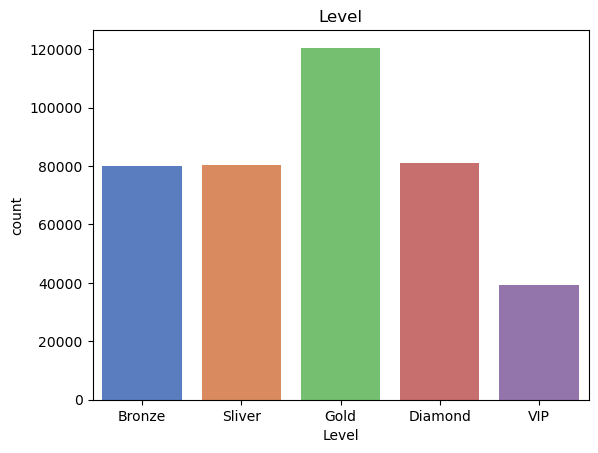

In [52]:
sns.countplot(x='Level', data=co_rfm_df, palette='muted', order=order)
plt.title('Level')
plt.show()

### 차트 시각화 자료 분석 결과 
각 회원의 등급을 시각화 자료로 분석한 결과 VIP, 다이아몬드의 회원 등급 거의 동일한 수준의 분포를 보이고 있으며,
가장 많은 분포를 가진 회원 등급은 실버 등급의 회원들이고, 가장 하위의 분포를 가진 회원 등급은 다이아몬드,VIP 회원들이였습니다.
그러나 각 국가에 따라서 이러한 멤버 등급은 서로 다를 수 있으며, 이 점을 유의하여 국가별로 멤버 등급을 분석하는 것이 더 중요할 것입니다.

### 💡 결론
실버 회원들의 특성 및 구매 패턴, 그리고 다이아 및 VIP 회원들의 혜택 및 서비스에 대한 분석이 필요할 것으로 보입니다. 또한, 이러한 분석을 토대로 VIP 회원들의 수를 늘리고, 실 등급 회원들을 유지하며 신규 고객을 유치하는 전략을 수립할 필요가 있을 것입니다.





In [54]:
co_rfm_df['country'].value_counts()
# 영국의 데이터 수가 압도적으로 많은 것으로 미루어보아 아마 영국 내 기업인 것으로 예상

country
United Kingdom          356501
Germany                   9477
France                    8475
EIRE                      7475
Spain                     2527
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      802
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     245
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [55]:
price = co_rfm_df.groupby('country')['TotalScore'].sum().sort_values(ascending=False)
print(price)
# 국가별 RFM 통계 합산 = 영국 ,EIRE , 독일,프랑스,스페인,벨기에,스위스,포르투갈,핀란드,이탈리아 ...

country
United Kingdom          354078.527794
EIRE                     15325.139072
Germany                   8855.815493
France                    8122.086414
Netherlands               4966.710814
Spain                     2361.406174
Belgium                   1880.607699
Australia                 1559.595792
Switzerland               1533.380778
Portugal                  1336.458066
Norway                    1076.787758
Italy                      673.609507
Finland                    641.029327
Channel Islands            633.032944
Cyprus                     524.505072
Sweden                     451.428285
Denmark                    350.606538
Austria                    326.688629
Japan                      306.779140
Poland                     291.920907
USA                        246.421134
Singapore                  211.256222
Iceland                    187.661997
Israel                     177.704594
Unspecified                155.331604
Malta                      109.474438
Cana

In [56]:
price =co_rfm_df.groupby('country')['price'].sum().sort_values(ascending=False)
print(price)
#  나라별 결제 합산

country
United Kingdom          1155894.124
France                    42825.230
EIRE                      38209.260
Germany                   37628.040
Singapore                 25108.890
Portugal                  12903.250
Spain                     11495.500
Belgium                    7540.130
Switzerland                6568.600
Norway                     6529.060
Netherlands                6492.550
Australia                  4048.000
Cyprus                     3880.040
Italy                      3874.890
Finland                    3786.850
Channel Islands            3736.900
Sweden                     1804.730
Austria                    1701.520
Poland                     1422.270
Denmark                    1266.950
Canada                      910.580
Israel                      898.590
Japan                       814.860
Unspecified                 775.950
Greece                      713.290
Malta                       666.010
USA                         644.980
Iceland             

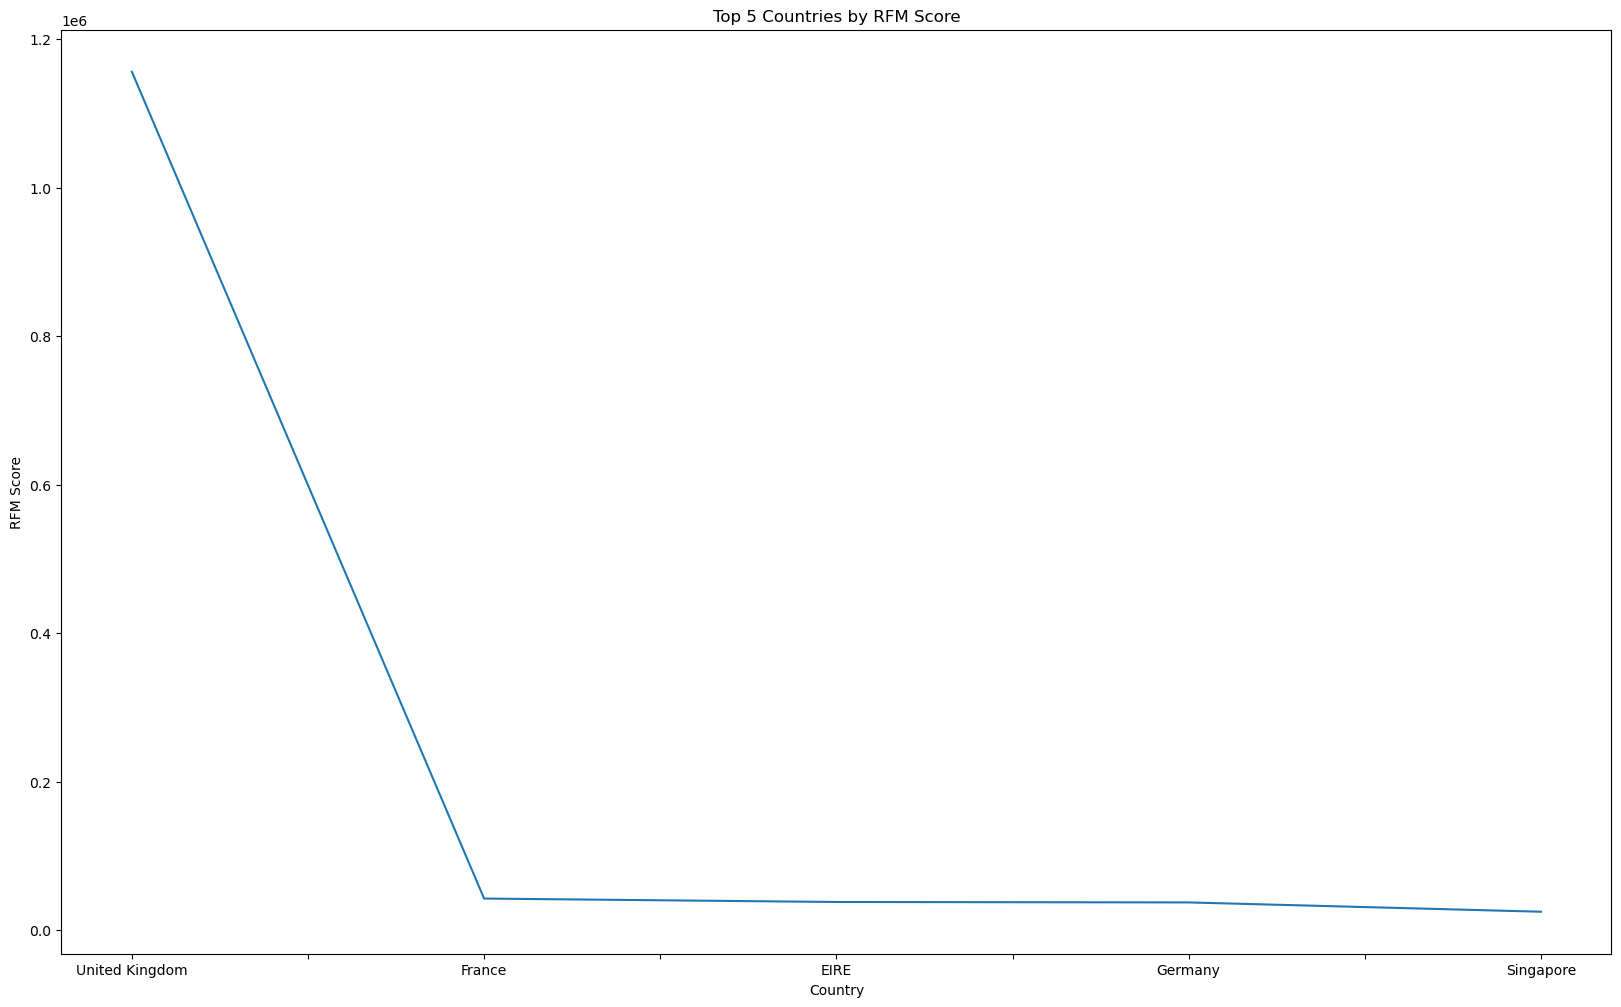

In [57]:
fig, axes = plt.subplots(1, figsize=(20, 12))

# 각 나라별로 RFM 점수를 합산 (상위 5개 국가 추출)
price_by_country = co_rfm_df.groupby('country')['price'].sum().nlargest(5)
# nlargest() = 열을 기준으로 가장 큰 값을 가지는 요소들을 선택하는 메서드이며, 가장 큰 값을 가지는 
#상위 N개의 요소를 선택할 때 사용함

# 시각화
price_by_country.plot(kind='line', ax=axes)
axes.set_title('Top 5 Countries by RFM Score')
axes.set_xlabel('Country')
axes.set_ylabel('RFM Score')
plt.show()


총 결제금액 합산 역시 영국이 압도적으로 많은 것을 확인 할 수 있으며, 그 다음으로 프랑스, 아일랜드, 독일, 싱가포르, 순으로 많은 것을 알 수 있습니다.

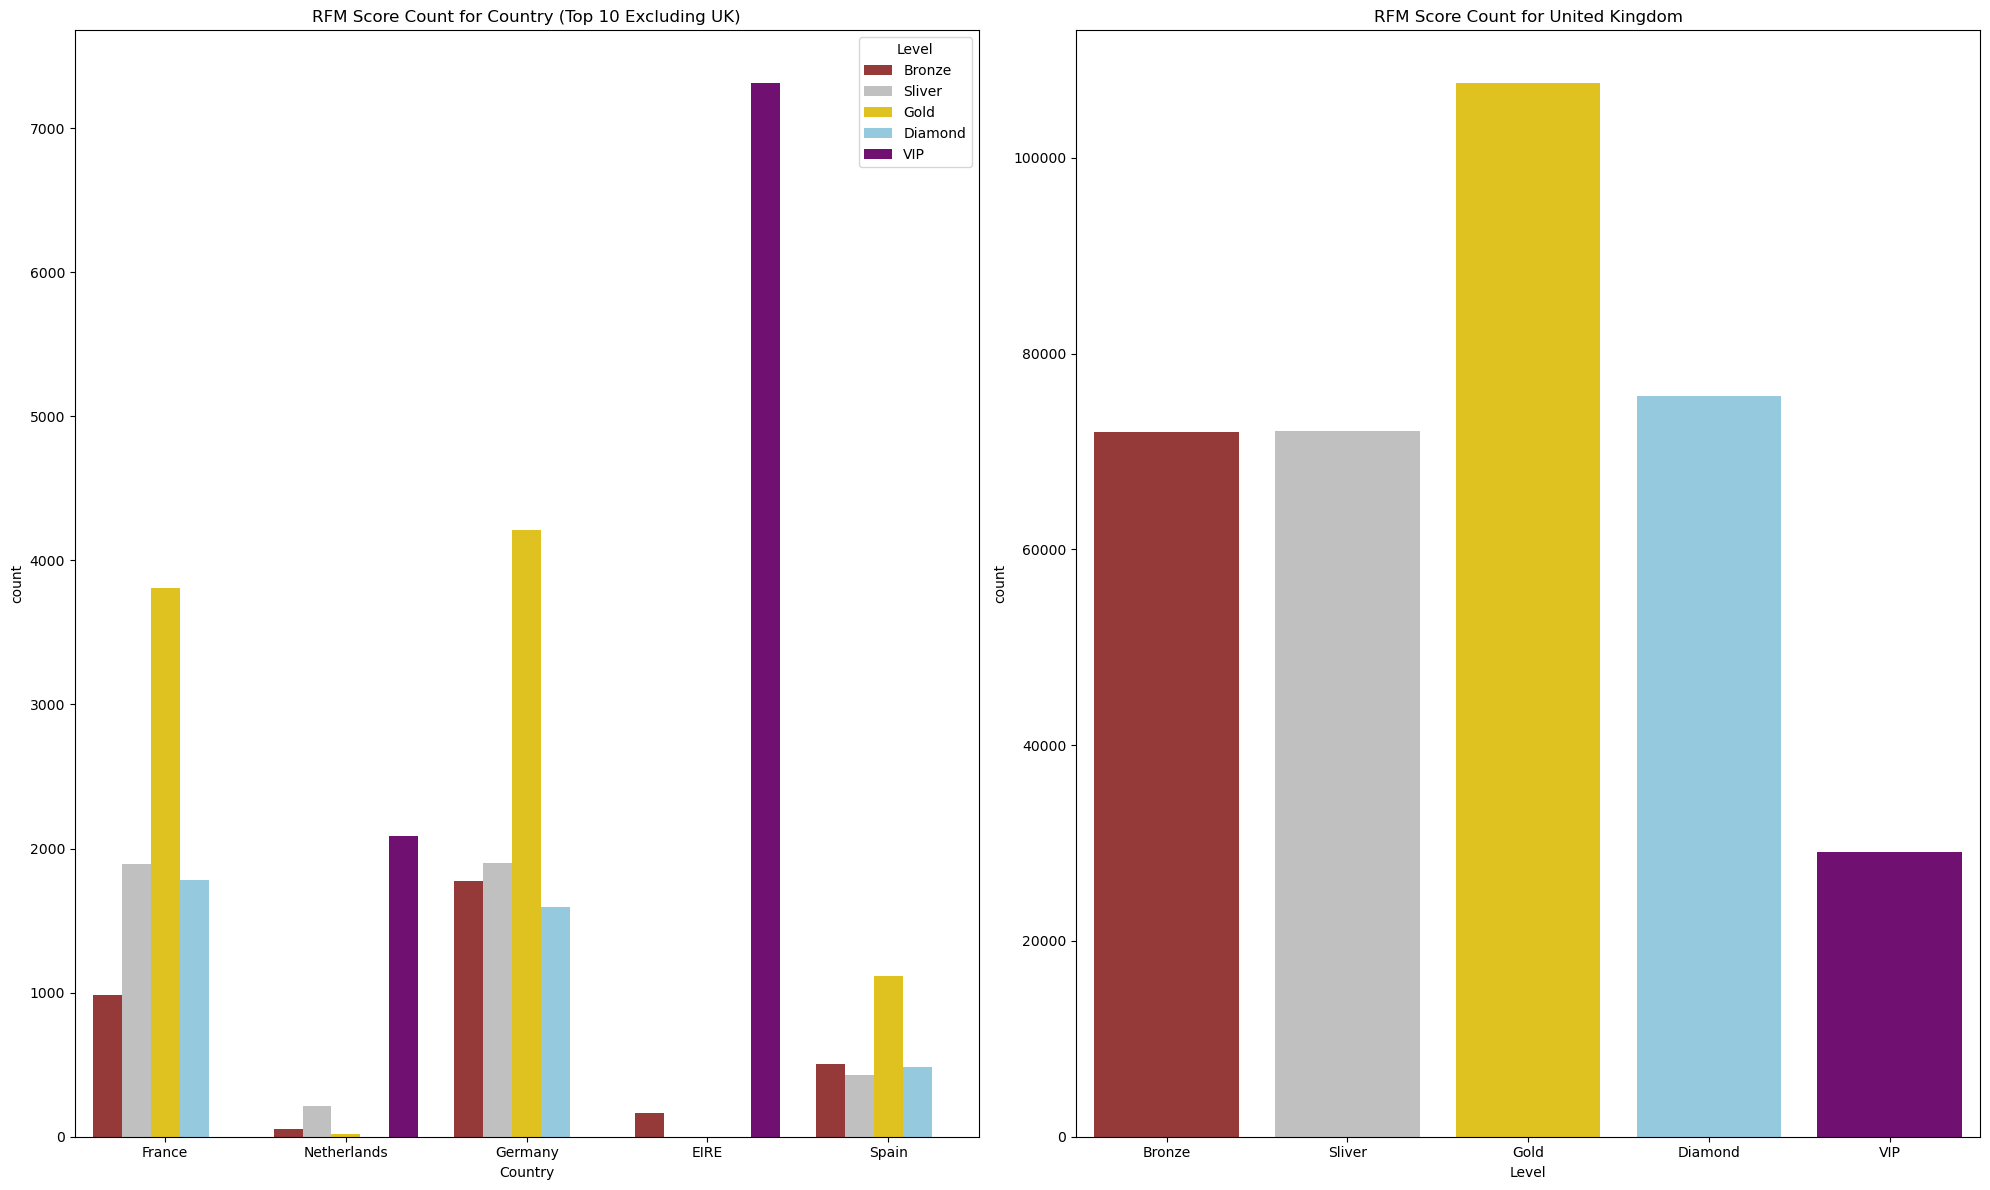

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = {'Bronze': 'brown', 'Sliver': 'silver', 'Gold': 'gold', 'Diamond': 'skyblue', 'VIP': 'purple'}
order_columns = ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP']

# 영국을 제외한 상위 10개 국가 선택 (영국 국적을 가진 회원들의 수가 매우 많기 때문에)
# top_countries = real_df[real_df['country'] != 'United Kingdom']['country'].value_counts().nlargest(10).index
# nlargest() = 열을 기준으로 가장 큰 값을 가지는 요소들을 선택하는 메서드이며, 가장 큰 값을 가지는 
#상위 N개의 요소를 선택할 때 사용함

# 영국을 제외한 상위 10개 국가 선택 (영국 국적을 가진 회원들의 수가 매우 많기 때문에)
# 인덱스 슬라이싱을 사용하여 영국을 제외한 상위 5개 국가 추출 
top_countries = co_rfm_df[co_rfm_df['country'] != 'United Kingdom']['country'].value_counts().index[:5]

# 상위 10개 국가에 해당하는 데이터 필터링
filtered_df = co_rfm_df[co_rfm_df['country'].isin(top_countries)]

# 그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# 왼쪽 그래프: 영국을 제외한 상위 10개 국가에 대한 등급별 RFM 합산 차트 시각화
sns.countplot(ax=axes[0], x='country', hue='Level', data=filtered_df, palette=colors, hue_order=order_columns)
axes[0].set_title('RFM Score Count for Country (Top 10 Excluding UK)')
axes[0].set_xlabel('Country')

# 오른쪽 그래프: 영국(United Kingdom)에 대한 등급별 RFM 합산 차트 시각화 
uk_df = co_rfm_df[co_rfm_df['country'] == 'United Kingdom']
sns.countplot(ax=axes[1], x='Level', order=order_columns, data=uk_df, palette=colors)
axes[1].set_title('RFM Score Count for United Kingdom')
axes[1].set_xlabel('Level')

plt.tight_layout()
plt.show()

### 🌏 해외 마케팅 전략
> (영국 내 기업인 것으로 판단하여, 영국을 제외한 상위 10개 국가에 대한 마케팅 전략 분석)

#### <img src="./images/germany.png" width="30px"> 독일 마케팅 전략
- 독일에서는 골드 등급 회원들이 가장 많은 것으로 나타났으므로, 독일 시장에서는 골드 등급 회원들을 주요 타겟으로 삼을 수 있습니다.
- 골드 등급 회원들은 높은 구매율과 충성도를 보이기 때문에, 특별한 혜택이나 프리미엄 서비스를 제공하여 이탈을 방지하고 브랜드 충성도를 높일 수 있습니다.
- 실버 등급 회원도 상당한 수를 차지하고 있으므로, 이들에게도 주의를 기울일 필요가 있습니다.
- 실버 등급 회원들에게는 추가 혜택을 제공하여 충성도를 높이고, 상위 등급으로의 등급 업그레이드를 유도하여 수익을 창출 할 수 있습니다.
- 다이아몬드 등급의 회원도 브론즈,VIP 회원 보다 많은 수치를 기록하였으므로 다이아몬드 등급 회원들에게는 특별 프로모션을 제공하여, 수익성을 창출할 수 있습니다.
- 브론즈 및 VIP 등급 회원의 수가 상대적으로 적은 것으로 나타났으므로, 이들을 늘리는 데에 중점을 두어야 합니다.
- 브론즈 및 VIP 등급 회원들을 대상으로 한 특별한 혜택이나 프로모션을 제공하여 등급 업그레이드를 유도할 수 있습니다.

#### <img src="./images/france.png" width="30px"> 프랑스 마케팅 전략
- 가장 많은 회원이 골드 등급이므로, 프랑스 시장에서는 골드 등급 회원들을 주요 타겟으로 삼을 수 있습니다.
- 골드 등급 회원들에게는 할인 혜택이나 특별한 혜택을 제공하여 충성도를 높일 수 있습니다.
-  다이아몬드 등급과 같은 상위 등급의 회원들도 상당수를 차지하고 있으므로, 이들에게 추가 혜택을 제공하여 이탈을 방지하고 충성도를 높일 수 있습니다.
- 특히 이러한 상위 등급의 고객의 경우 기업의 핵심 고객이기 때문에, 프리미엄 서비스나 제품을 홍보하고 이와 같은 마케팅을 프랑스 내의 골드 및 다이아몬드 회원들을 위해 마케팅 전략을 확장하여야 합니다.
- 브론즈 및 VIP 등급 회원의 수가 상대적으로 적은 것으로 나타났으므로, 이들을 늘리는 데에 초점을 맞출 필요가 있습니다.
- 브론즈 등급 회원들에게는 특별한 할인 혜택을 제공하여 등급 업그레이드를 유도할 수 있습니다.
- VIP 등급 회원들에게는 특별 프로모션을 제공하여 이탈을 방지하고 이전보다 높은 수익을 창출 할 수 있습니다.
  

#### 위의 전략들을 적용하여 상위 2개의 국가 시장에서 브랜드의 인지도를 높이고 고객들의 충성도를 높일 수 있을 것입니다.
- 독일 프랑스 다음으로 RFM 합산 점수가 높았던 국가로는 스페인, 스위스, 벨기에 순이였습니다. 
- 이 3개의 국가들의 경우 각 멤버별 등급이 각기 달랐으며, 이를 통계로 나머지 국가들에 대해서 분석을 하였습니다.

#### <img src="./images/iland.png" width="30px"> 아일랜드 마케팅 전략
- 아일랜드 같은 경우 VIP 회원이 압도적으로 많았으며, 이에 맞춰서 아일랜드의 VIP 회원들에게 특별 이벤트 및 VIP 프로모션 이벤트를 진행하여 높은 수익을 창출 할 수 있습니다.

#### <img src="./images/swice.png" width="30px"> 스위스 마케팅 전략
- 스위스는 골드 등급의 회원들이 가장 많이 분포되어있었고,, 이러한 골드 등급 회원들에게는 추가 혜택 및 프로모션을 제공하여 상위 등급으로의 업그레이드를 유도하고 이탈을 방지하여야 하는 마케팅 전략을 세워야합니다.
- 
#### <img src="./images/bel.png" width="30px"> 벨기에 마케팅 전략
- 그 다음 벨기에의 경우 골드 등급의 회원들이 가장 많았으며 골드 등급의 회원들에게는 추가 혜택 및 프로모션을 제공하여 다이아몬드 등급으로의 업그레이드를 유도하고 이탈을 방지하여야 하는 마케팅 전략을 세워야합니다. 


### 결론 
상위 10개 국가 중 가장 높은 RFM 점수를 기록한 독일과 프랑스에 집중적인 마케팅 전략을 펼쳐야 하며, 나머지 국가 들에 대해서도 앞서 분석한 개별 국가에 대한 마케팅 전략을 참고하여 각 국가의 특성과 회원 등급 분포에 맞춰 맞춤형 마케팅 전략을 도입하여야 합니다.

### <img src="./images/uk.png" width="30px"> 영국 내 마케팅 전략 
> RFM 분석 결과 가장 많은 비중을 차지한 영국의 경우 골드 등급의 회원들이 가장 많은 것을 확인 할 수 있으며,

> 그 다음으로 브론즈, 다이아몬드, 실버 , VIP 등급 순으로 회원들의 등급이 분포 되있는 것을 확인 할 수 있었습니다.

#### 골드 등급 회원 타겟팅
- 골드 등급 회원이 가장 많은 것으로 나타났으므로, 골드 등급 회원을 중점적으로 타겟으로 삼습니다.
- 골드 등급 회원들은 이미 높은 충성도를 보이는 고객이므로, 추가 혜택을 제공하여 그들의 충성도를 유지하고 이탈을 방지합니다.
- 골드 등급 회원들을 대상으로 한 특별 프로모션, 할인 혜택 등을 제공하여 그들의 만족도를 높이고 추가 구매를 유도합니다.
#### 브론즈 및 다이아몬드, 실버, VIP 등급 회원 타겟팅
- 골드 등급 이외의 회원들에게도 주의를 기울이며, 각 등급에 맞는 특별한 혜택을 제공합니다.
- 브론즈 등급 회원에게는 등급 업그레이드를 유도하는 혜택을 제공하여 충성도를 높입니다.
- VIP 등급 회원들에게는 VIP 서비스, 이벤트 초대 등 고급 서비스를 제공하여 수익성을 향상시킵니다.
- 다이아몬드 등급 회원들에게는 VIP 등급으로의 업그레이드를 유도하여 특별 프로모션을 제공하거나 할인 혜택을 제공합니다.
- 브론즈 등급 회원들에게는 특별한 할인 혜택을 제공하여 이탈을 방지하고, 이들을 늘리는 데에 중점을 두어야 합니다.
#### 결론 
각 등급의 회원들에게 위와 같은 맞춤형 마케팅 캠페인을 실행하고, 이러한 전략을 통해 영국 내 고객들의 충성도를 높이고 매출을 증가시킬 수 있습니다.

In [ ]:
# real_df.groupby('Level')['code'].value_counts()
# real_df['code'].value_counts()

# real_df.groupby('code')['country'].value_counts()

In [ ]:
real_df['code'].value_counts().index[:10]

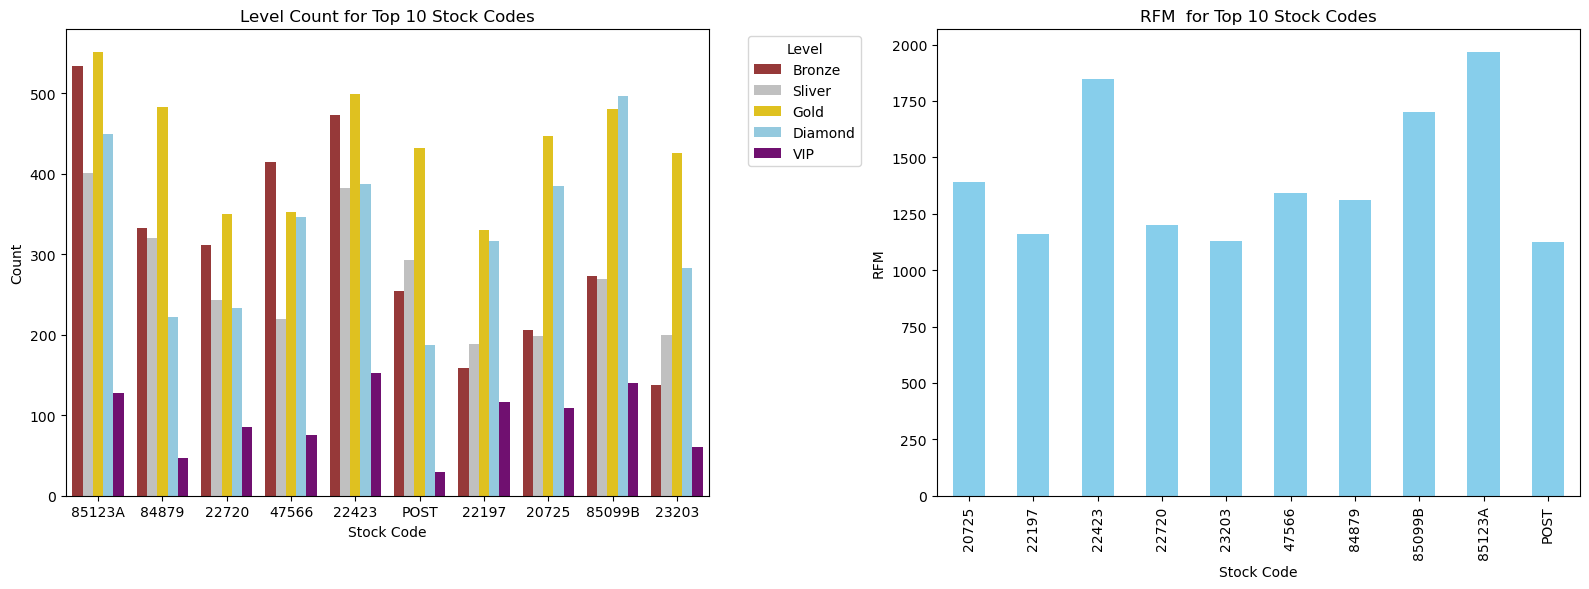

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상위 10개 상품 코드 추출
top_codes = co_rfm_df['code'].value_counts().index[:10]
filtered_df = co_rfm_df[co_rfm_df['code'].isin(top_codes)]


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = {'Bronze': 'brown', 'Silver': 'silver', 'Gold': 'gold', 'Diamond': 'skyblue', 'VIP': 'purple'}
colors = {'Bronze': 'brown', 'Sliver': 'silver', 'Gold': 'gold', 'Diamond': 'skyblue', 'VIP': 'purple'}
order_columns = ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP']

sns.countplot(ax=axes[0], x='code', hue='Level', data=filtered_df, palette=colors, hue_order=order_columns)
axes[0].set_title('Level Count for Top 10 Stock Codes')
axes[0].set_xlabel('Stock Code')
axes[0].set_ylabel('Count')
axes[0].legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Stock Code의 RFM 합산 결과 차트
price_sum = filtered_df.groupby('code')['TotalScore'].sum()
price_sum.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('RFM  for Top 10 Stock Codes')
axes[1].set_xlabel('Stock Code')
axes[1].set_ylabel('RFM')

plt.tight_layout()
plt.show()


### 상품별 마케팅 전략
- 21034 코드를 가지는  상품의 경우 실버 등급과 골드 등급 회원들의 분포수가 높은 것을 보아 가장 인기 상품인 것으로 추측 할 수 있습니다. 오른쪽 그래프 역시 21034 상품의 RFM 점수가 가장 높은 것을 볼 수 있습니다.
- 그리고 20725 코드를 가지는 제품 또한 실버 등급의 회원들의 분포수가 압도적으로 많은 것을 확인 할 수 있으며, 이를 미루어보았을때 대중적인 상품인것으로 확인 할 수 있습니다. 위 두 해당 상품의 인기를 바탕으로 관련 상품 또는 부가 상품을 함께 마케팅하여 상호 보완적인 상품 판매를 유도할 수 있습니다.
  
- 그리고 85099B, 22197, 22086 상품들은 VIP 등급 및 다이아몬드 등급의 분포수가 가장 높은 것을 볼 수 있습니다.
  이를 보았을때, 이러한 상품들은 브랜드 이미지나 품질 등에 대한 높은 평가를 받고 있을 가능성이 있으며, 이를 바탕으로 추가적인 마케팅 및 프로모션 활동을 통해 이들 회원들의 충성도를 높일 수 있습니다.

> 이러한 전략들을 통해 상품의 인기도를 높이고 고객들의 만족도를 높이며, 결과적으로 매출을 증대할 수 있습니다.'